<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [7]:
from googletrans import Translator
import pandas as pd

data = pd.read_csv("datos13112020.csv")
data = data.sample(50)
data.head()

,tweet,date,city,place,id,link
2,"@SaraTufanoZ @aarangob11 Corrupción, salud y e...",2020-11-21 00:48:28,Bogotá,Bogotá,1329949769242906625,https://twitter.com/i/web/status/1329949769242...
57,💰 La oficina de estadística también señaló que...,2020-11-17 19:40:00,Cartagena,"Barranquilla, Colombia",1328784974791680000,https://twitter.com/i/web/status/1328784974791...
65,@fmonroy El primer paso es salir de esta basur...,2020-11-18 04:58:03,Cúcuta,"venezuela, tachira",1328925415310823424,https://twitter.com/i/web/status/1328925415310...
133,Nuestros impuestos sirven para otorgárselos a ...,2020-11-20 01:30:40,Armenia,"Armenia, Colombia",1329597999299891201,https://twitter.com/i/web/status/1329597999299...
20,@WelcomeMcHondo @federalxr @MirandaBogota @AAB...,2020-11-21 02:31:47,Cali,Colombia,1329975768173211650,https://twitter.com/i/web/status/1329975768173...


In [8]:
translator = Translator()
data['ing'] = data['tweet'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
data.head()


,tweet,date,city,place,id,link,ing
2,"@SaraTufanoZ @aarangob11 Corrupción, salud y e...",2020-11-21 00:48:28,Bogotá,Bogotá,1329949769242906625,https://twitter.com/i/web/status/1329949769242...,"Translated(src=es, dest=en, text=@SaraTufanoZ ..."
57,💰 La oficina de estadística también señaló que...,2020-11-17 19:40:00,Cartagena,"Barranquilla, Colombia",1328784974791680000,https://twitter.com/i/web/status/1328784974791...,"Translated(src=es, dest=en, text=💰 The statist..."
65,@fmonroy El primer paso es salir de esta basur...,2020-11-18 04:58:03,Cúcuta,"venezuela, tachira",1328925415310823424,https://twitter.com/i/web/status/1328925415310...,"Translated(src=es, dest=en, text=@fmonroy The ..."
133,Nuestros impuestos sirven para otorgárselos a ...,2020-11-20 01:30:40,Armenia,"Armenia, Colombia",1329597999299891201,https://twitter.com/i/web/status/1329597999299...,"Translated(src=es, dest=en, text=Our taxes are..."
20,@WelcomeMcHondo @federalxr @MirandaBogota @AAB...,2020-11-21 02:31:47,Cali,Colombia,1329975768173211650,https://twitter.com/i/web/status/1329975768173...,"Translated(src=es, dest=en, text=@WelcomeMcHon..."


In [9]:
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,tweet,date,city,place,id,link,ing,ingles
2,"@SaraTufanoZ @aarangob11 Corrupción, salud y e...",2020-11-21 00:48:28,Bogotá,Bogotá,1329949769242906625,https://twitter.com/i/web/status/1329949769242...,"Translated(src=es, dest=en, text=@SaraTufanoZ ...","@SaraTufanoZ @ aarangob11 Corruption, health a..."
57,💰 La oficina de estadística también señaló que...,2020-11-17 19:40:00,Cartagena,"Barranquilla, Colombia",1328784974791680000,https://twitter.com/i/web/status/1328784974791...,"Translated(src=es, dest=en, text=💰 The statist...",💰 The statistical office also pointed out that...
65,@fmonroy El primer paso es salir de esta basur...,2020-11-18 04:58:03,Cúcuta,"venezuela, tachira",1328925415310823424,https://twitter.com/i/web/status/1328925415310...,"Translated(src=es, dest=en, text=@fmonroy The ...",@fmonroy The first step is to get out of this ...
133,Nuestros impuestos sirven para otorgárselos a ...,2020-11-20 01:30:40,Armenia,"Armenia, Colombia",1329597999299891201,https://twitter.com/i/web/status/1329597999299...,"Translated(src=es, dest=en, text=Our taxes are...","Our taxes are used to grant them to Avianca, t..."
20,@WelcomeMcHondo @federalxr @MirandaBogota @AAB...,2020-11-21 02:31:47,Cali,Colombia,1329975768173211650,https://twitter.com/i/web/status/1329975768173...,"Translated(src=es, dest=en, text=@WelcomeMcHon...",@WelcomeMcHondo @federalxr @MirandaBogota @AAB...


In [11]:
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,date,city,place,id,link,ing,ingles,sentimiento
2,"@SaraTufanoZ @aarangob11 Corrupción, salud y e...",2020-11-21 00:48:28,Bogotá,Bogotá,1329949769242906625,https://twitter.com/i/web/status/1329949769242...,"Translated(src=es, dest=en, text=@SaraTufanoZ ...","@SaraTufanoZ @ aarangob11 Corruption, health a...",-0.7501
57,💰 La oficina de estadística también señaló que...,2020-11-17 19:40:00,Cartagena,"Barranquilla, Colombia",1328784974791680000,https://twitter.com/i/web/status/1328784974791...,"Translated(src=es, dest=en, text=💰 The statist...",💰 The statistical office also pointed out that...,0.0000
65,@fmonroy El primer paso es salir de esta basur...,2020-11-18 04:58:03,Cúcuta,"venezuela, tachira",1328925415310823424,https://twitter.com/i/web/status/1328925415310...,"Translated(src=es, dest=en, text=@fmonroy The ...",@fmonroy The first step is to get out of this ...,0.6858
133,Nuestros impuestos sirven para otorgárselos a ...,2020-11-20 01:30:40,Armenia,"Armenia, Colombia",1329597999299891201,https://twitter.com/i/web/status/1329597999299...,"Translated(src=es, dest=en, text=Our taxes are...","Our taxes are used to grant them to Avianca, t...",0.7269
20,@WelcomeMcHondo @federalxr @MirandaBogota @AAB...,2020-11-21 02:31:47,Cali,Colombia,1329975768173211650,https://twitter.com/i/web/status/1329975768173...,"Translated(src=es, dest=en, text=@WelcomeMcHon...",@WelcomeMcHondo @federalxr @MirandaBogota @AAB...,-0.6279


In [12]:
data[['tweet', 'sentimiento']].sort_values('sentimiento')

,tweet,sentimiento
85,@AFPespanol Así de inútil es @IvanDuque que:\n...,-0.9325
98,@jsanchezcristo Una isla que esta bien lejos d...,-0.8225
2,"@SaraTufanoZ @aarangob11 Corrupción, salud y e...",-0.7501
20,@WelcomeMcHondo @federalxr @MirandaBogota @AAB...,-0.6279
103,Conversé con @Alejobarrera89 @mateo9008 y @Osc...,-0.5719
134,Conversé con @Alejobarrera89 @mateo9008 y @Osc...,-0.5719
54,"@FelicianoValen No sea absurdo, elemental e ig...",-0.5271
111,@CathyJuvinao La izquierda criminal no habla d...,-0.5013
43,@navarrowolff @aureliobabiloni Lo que muestran...,-0.4939
48,@ELTIEMPO Lo que muestran los indicadores los ...,-0.4939


###   Punto 2: ¿Cuál es el tuit más positivo y más negativo?

### Positivo

In [15]:
data.loc[131]['tweet']

'#Economía | Entre los múltiples beneficios tributarios que Colombia ofrece para fomentar la inversión en sus distintas regiones del país, se encuentra un competitivo régimen de Zonas Francas. Conoce más de este en 👉🏼 https://t.co/ly6OcQoVan'

### Negativo

In [16]:
data.loc[85]['tweet']

'@AFPespanol Así de inútil es @IvanDuque que:\n1) La última recesión economía en el país fue en la presidencia del inepto @AndresPastrana_ \n2) Es tal su pésimo manejo económico, que ni la Coca (históricamente ha sido la que ha mantenido a flote la economía del país) pudo evitar el descalabro.'

###   Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [44]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence("Instalar Pytorch es un dolor de cabeza, lo odio")
classifier.predict(sentence)
sentence.labels


2020-11-21 00:22:57,639 loading file C:\Users\Usuario\.flair\models\sentiment-en-mix-distillbert_3.1.pt


[NEGATIVE (0.9438)]

In [83]:
classifier = TextClassifier.load('sentiment')

def sent_flair(tweet):
    sentence = Sentence(tweet)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

data['sent_flair'] = data['tweet'].apply(lambda valor: sent_flair(valor))
data.head()

2020-11-21 00:47:48,155 loading file C:\Users\Usuario\.flair\models\sentiment-en-mix-distillbert_3.1.pt


,tweet,date,city,place,id,link,ing,ingles,sentimiento,sent_flair
2,"@SaraTufanoZ @aarangob11 Corrupción, salud y e...",2020-11-21 00:48:28,Bogotá,Bogotá,1329949769242906625,https://twitter.com/i/web/status/1329949769242...,"Translated(src=es, dest=en, text=@SaraTufanoZ ...","@SaraTufanoZ @ aarangob11 Corruption, health a...",-0.7501,0.980182
57,💰 La oficina de estadística también señaló que...,2020-11-17 19:40:00,Cartagena,"Barranquilla, Colombia",1328784974791680000,https://twitter.com/i/web/status/1328784974791...,"Translated(src=es, dest=en, text=💰 The statist...",💰 The statistical office also pointed out that...,0.0000,0.636248
65,@fmonroy El primer paso es salir de esta basur...,2020-11-18 04:58:03,Cúcuta,"venezuela, tachira",1328925415310823424,https://twitter.com/i/web/status/1328925415310...,"Translated(src=es, dest=en, text=@fmonroy The ...",@fmonroy The first step is to get out of this ...,0.6858,0.959581
133,Nuestros impuestos sirven para otorgárselos a ...,2020-11-20 01:30:40,Armenia,"Armenia, Colombia",1329597999299891201,https://twitter.com/i/web/status/1329597999299...,"Translated(src=es, dest=en, text=Our taxes are...","Our taxes are used to grant them to Avianca, t...",0.7269,-0.548402
20,@WelcomeMcHondo @federalxr @MirandaBogota @AAB...,2020-11-21 02:31:47,Cali,Colombia,1329975768173211650,https://twitter.com/i/web/status/1329975768173...,"Translated(src=es, dest=en, text=@WelcomeMcHon...",@WelcomeMcHondo @federalxr @MirandaBogota @AAB...,-0.6279,0.935298


In [84]:
data[['tweet', 'sent_flair']].sort_values('sent_flair')

,tweet,sent_flair
98,@jsanchezcristo Una isla que esta bien lejos d...,-0.963822
48,@ELTIEMPO Lo que muestran los indicadores los ...,-0.789609
43,@navarrowolff @aureliobabiloni Lo que muestran...,-0.785332
63,@omarquez19 @roshernandez Se nota que estás fu...,-0.776554
171,Lo que hay que hacer es empezar a depender men...,-0.731735
159,#ElMinimoDebeSer debe ser 1’500.000 mínimo. es...,-0.716917
47,@MariaFdaCabal @fredyhcar Lo que muestran los ...,-0.603379
46,@FoxNews @fredyhcar Lo que muestran los indica...,-0.592177
116,Mediante un comunicado el embajador del país n...,-0.557503
133,Nuestros impuestos sirven para otorgárselos a ...,-0.548402


In [85]:
data.loc[62]['tweet']

'@alemarchetti91 @TorresART100 @MiguelPoloP Amigo mio, precisamente a eso es a lo que me refiero, si la gran mayoría de personas de este país depende del agro, como compiten con esos tlc, como producen, si la base de una economía es la producción, el campesinado está condenado a la miseria, conciencia por favor.'

In [86]:
positivos = data['sent_flair'] > 0
positivos

2       True
57      True
65      True
133    False
20      True
103     True
34      True
9       True
151     True
165     True
116    False
85      True
171    False
63     False
46     False
149     True
52      True
32      True
64      True
126     True
100     True
86      True
111     True
180     True
131     True
155     True
61      True
39      True
14      True
170     True
179     True
48     False
134     True
10      True
118     True
54      True
159    False
62      True
6      False
95      True
108     True
18      True
98     False
80      True
53      True
43     False
123     True
66      True
81      True
47     False
Name: sent_flair, dtype: bool

### Positivos

In [87]:
positivos.value_counts()[True]

39

### Negativos

In [88]:
positivos.value_counts()[False]

11

###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3

In [99]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

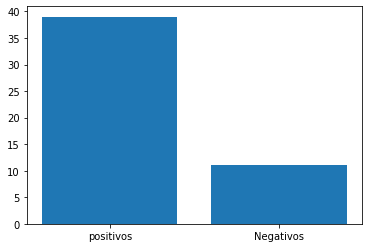

In [111]:
fig = plt.figure("tuits")
grupo = fig.add_subplot()

calificacion = ["positivos", "Negativos"]
puntaje = [39, 11]

ax.set_ylabel('puntaje')
ax.set_title('Cantidad de cmentarios :) y :(')
plt.bar(calificacion, puntaje)
plt.show

In [91]:
Positivos = 39
Negativos = 11

###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [113]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

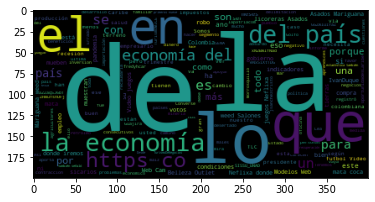

In [116]:
palabras = data.tweet.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()
